# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [2]:
data = pd.read_csv('/content/superstore_retail_orders.csv')

print(data.info())
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB
None
            order_id  order_date order_year_month    customer_name  \
count   56045.000000       56013            56013            56045   
unique           NaN         947               35            17343   
top              NaN  2022-03-01          2022-05 

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [6]:
# Correcting the numerical and categorical conversions based on the provided prompt
numerical_cols = ['quantity', 'product_price']
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

categorical_cols = ['product_line']
for col in categorical_cols:
    data[col] = data[col].astype('category')

# Checking for and removing outliers for 'product_price'
Q1 = data['product_price'].quantile(0.25)
Q3 = data['product_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['product_price'] >= lower_bound) & (data['product_price'] <= upper_bound)]

# Removing rows with empty (NULL) values
data.dropna(inplace=True)

# Creating a 'total_amount' variable based on 'product_price' and 'quantity'
data['total_amount'] = data['product_price'] * data['quantity']

# Verifying the final DataFrame after all operations
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51504 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   order_id          51504 non-null  int64   
 1   order_date        51504 non-null  object  
 2   order_year_month  51504 non-null  object  
 3   customer_name     51504 non-null  object  
 4   city              51504 non-null  object  
 5   state_province    51504 non-null  object  
 6   quantity          51504 non-null  float64 
 7   product_name      51504 non-null  object  
 8   product_line      51504 non-null  category
 9   product_price     51504 non-null  float64 
 10  total_amount      51504 non-null  float64 
dtypes: category(1), float64(3), int64(1), object(6)
memory usage: 4.4+ MB


<ipython-input-6-c5940ead3516>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-6-c5940ead3516>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_amount'] = data['product_price'] * data['quantity']


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue
- Create a bar chart
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

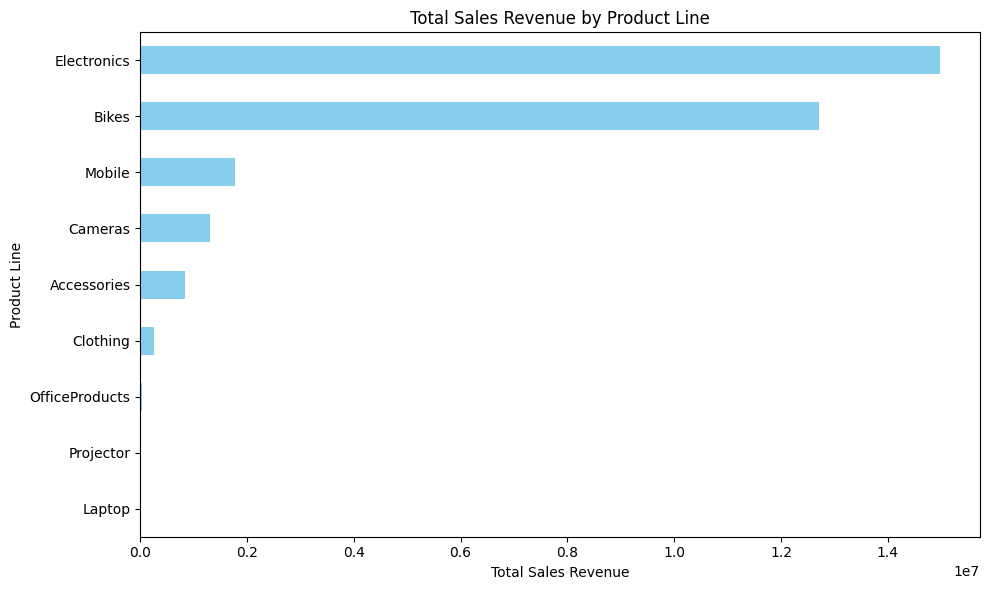

In [8]:
#bar chart
plt.figure(figsize=(10, 6))
data.groupby('product_line')['total_amount'].sum().sort_values().plot.barh(color='skyblue')
plt.xlabel('Total Sales Revenue')
plt.ylabel('Product Line')
plt.title('Total Sales Revenue by Product Line')
plt.tight_layout()
plt.show()

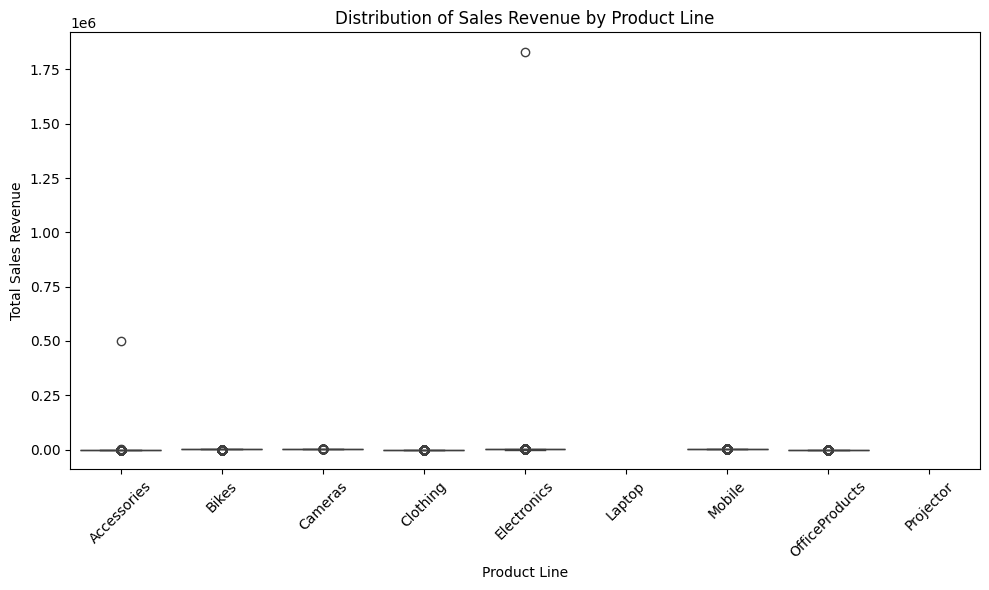

In [11]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_line', y='total_amount', data=data)
plt.xticks(rotation=45)
plt.ylabel('Total Sales Revenue')
plt.xlabel('Product Line')
plt.title('Distribution of Sales Revenue by Product Line')
plt.tight_layout()
plt.show()

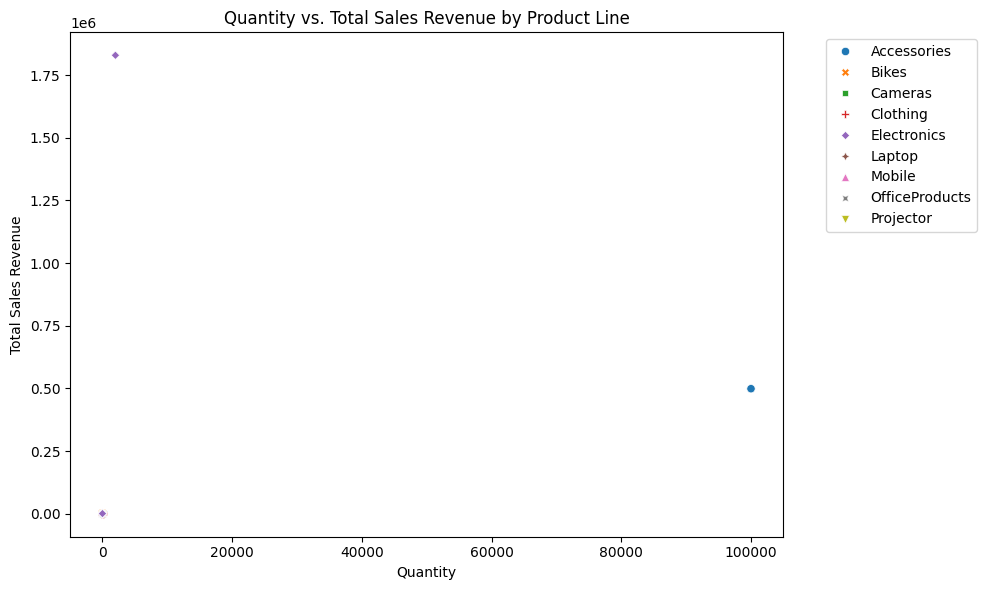

In [12]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='total_amount', data=data, hue='product_line', style='product_line')
plt.xlabel('Quantity')
plt.ylabel('Total Sales Revenue')
plt.title('Quantity vs. Total Sales Revenue by Product Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales  
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

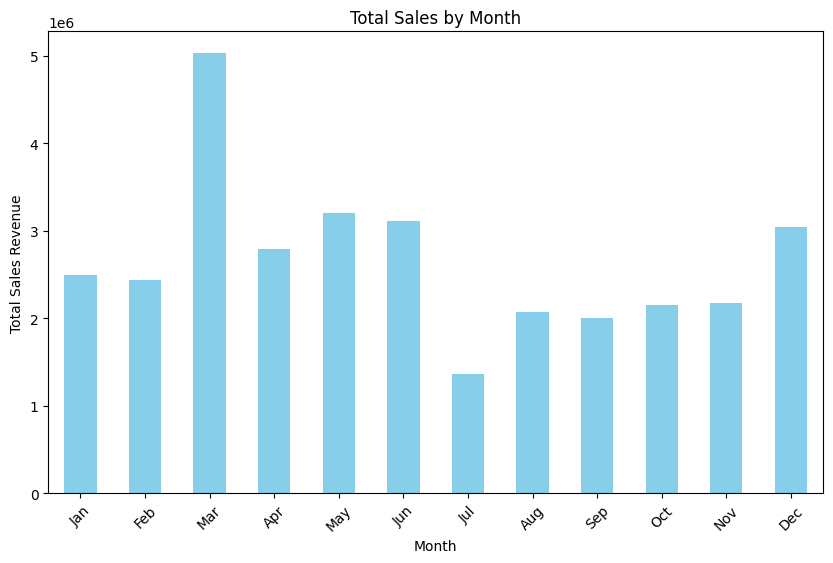

In [14]:
# Ensure 'order_date' is in datetime format
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

# Extract month from 'order_date'
data['month'] = data['order_date'].dt.month

# Aggregate total sales by month
monthly_sales = data.groupby('month')['total_amount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()



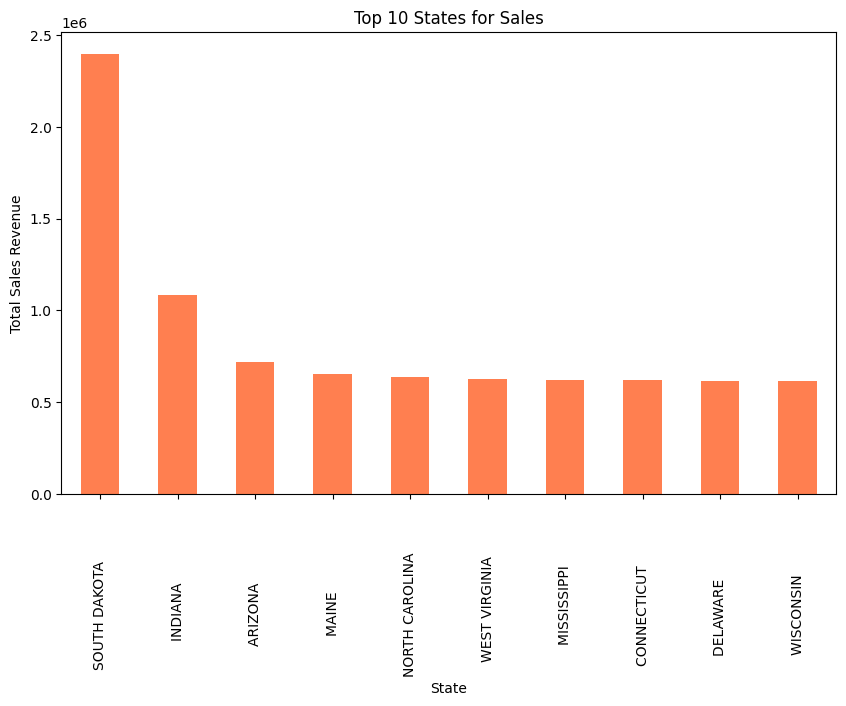

In [15]:
#sales by state
# Aggregate total sales by state
state_sales = data.groupby('state_province')['total_amount'].sum().sort_values(ascending=False)

# Plotting top 10 states
plt.figure(figsize=(10, 6))
state_sales.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 States for Sales')
plt.xlabel('State')
plt.ylabel('Total Sales Revenue')
plt.show()

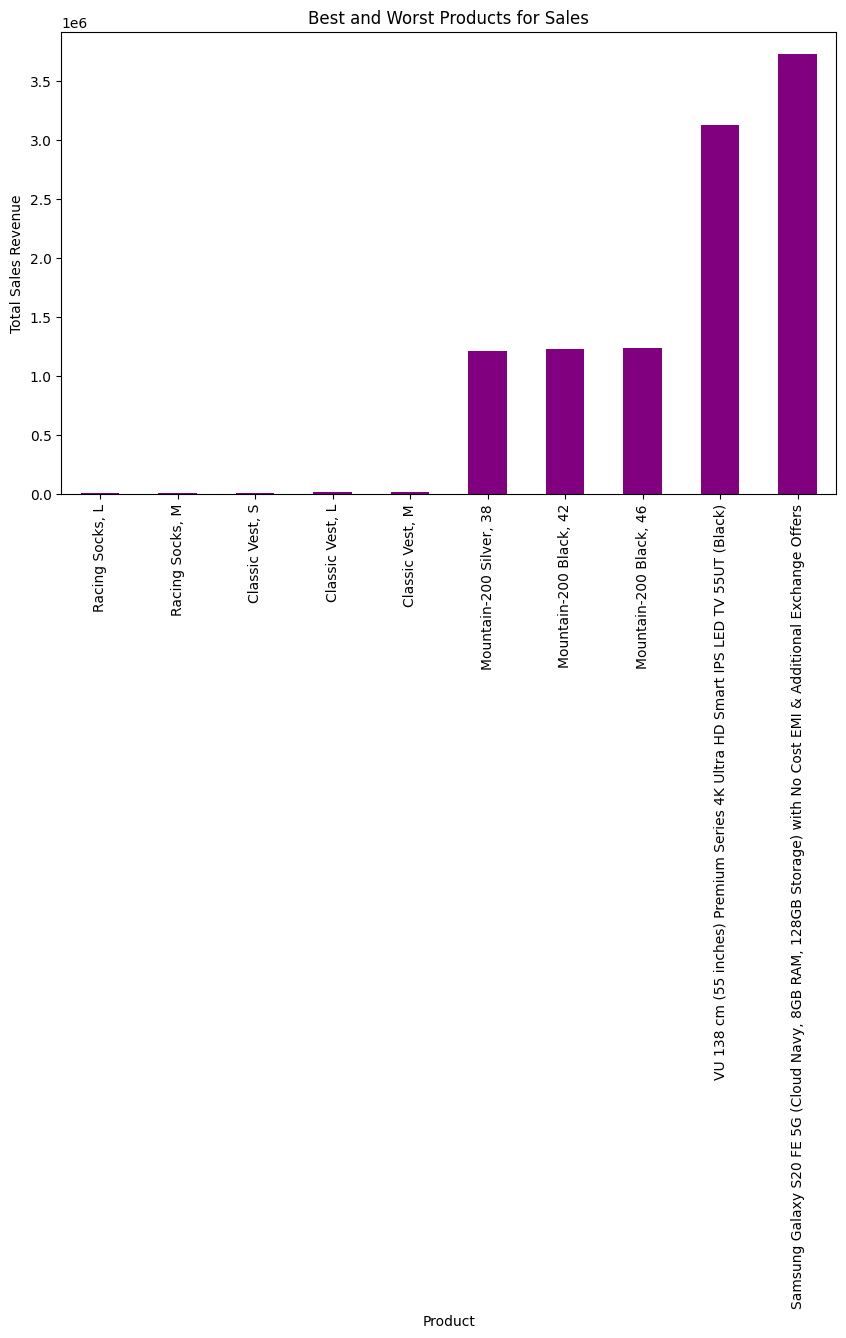

In [16]:
#sales by product
product_sales = data.groupby('product_name')['total_amount'].sum().sort_values()

# Plotting best and worst products
plt.figure(figsize=(10, 6))
pd.concat([product_sales.head(5), product_sales.tail(5)]).plot(kind='bar', color='purple')
plt.title('Best and Worst Products for Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales Revenue')
plt.show()